In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import cluster
from sklearn.preprocessing import scale
from sklearn.linear_model import LinearRegression as lr
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import json 
import os

sns.set(style="whitegrid")

pd.options.display.max_rows = 10

In [4]:
os.chdir('..')
cwd = os.getcwd()
data_dir = '/data/' #path to the data folder which contains a 'pre-processed' folder within it

In [10]:
# From Matthew's notebook: 
# Ideally would import with something like:
# from ipynb.fs.full.select_category import retrieve_category
# Even though I have run pipenv install ipynb, followed with pipenv shell in a new window before starting jupyter notebook

movie_details_neat = pd.read_pickle(cwd + data_dir + 'pre-processed/movie_details_neat.pkl')

with open(cwd + data_dir + 'pre-processed/id_maps.json', 'r') as f:
    id_maps = json.load(f)

def retrieve_category(df, column_name, ids, id_key_name, result_file_name='', id_maps=None):
    result = df[df.apply(lambda row: False if id_key_name not in row[column_name].keys() else (ids in (row[column_name][id_key_name])), axis=1)]
    if not result_file_name:
        if id_maps:
          result_file_name = column_name + '_' + id_maps[column_name][str(ids)]
        else:
          result_file_name = column_name + '_' + str(ids)
    result.to_pickle(cwd + data_dir + 'pre-processed/' + result_file_name + '.pkl')
    return result

def check_category(id_maps, column_name):
    print(json.dumps(id_maps[column_name], indent=4))

check_category(id_maps, 'genres')


{
    "18": "Drama",
    "10749": "Romance",
    "12": "Adventure",
    "14": "Fantasy",
    "28": "Action",
    "35": "Comedy",
    "80": "Crime",
    "53": "Thriller",
    "878": "Science Fiction",
    "27": "Horror",
    "9648": "Mystery",
    "10751": "Family",
    "16": "Animation",
    "10752": "War",
    "36": "History",
    "37": "Western",
    "10402": "Music",
    "99": "Documentary",
    "10769": "Foreign",
    "10770": "TV Movie"
}


In [42]:
#find the keywords that would allow us to pick out movies based off books (for example)
def idmap_searcher(id_map_key, kws):
    idz = []
    for query_string in kws:
        for id in id_maps[id_map_key]:
            if id_maps[id_map_key][id].find(query_string) != -1:
                idz.append(id)
                print(id_maps['keywords'][id], id)
            #if keyword in id_maps['keywords'][id]:
            #    idz.append(id)
            #    print(id_maps['keywords'][id])


In [43]:
# what keywords contain novel?
idmap_searcher('keywords', ['novel'])


based on novel 818
based on graphic novel 18712
based on young adult novel 223438
novelist 155251
stolen novel 180405
plagiarized novel 180412
crime novelist 185767


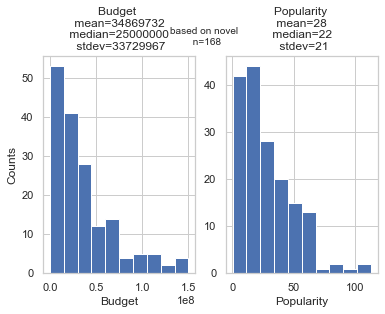

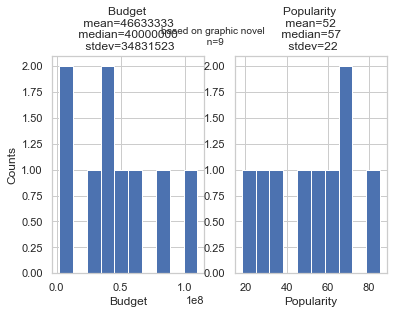

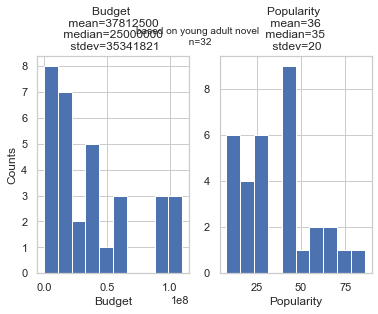

In [87]:
collect_these = {'keywords': [818, 18712, 223438]}
# can expand number of plots to include more of the columns etc.
for collect_type in collect_these.keys():
    for x in collect_these[collect_type]:
        thisgenre_df = retrieve_category(movie_details_neat, collect_type, x, 'id', '', id_maps)
    
        f, (ax1, ax2) = plt.subplots(1, 2)
        ax1 = thisgenre_df['budget'].hist(ax=ax1)
        ax1.set_title('Budget \n mean=%d \n median=%d \n stdev=%d' % (thisgenre_df['budget'].mean(), thisgenre_df['budget'].median(), thisgenre_df['budget'].std()))
        ax1.set_ylabel('Counts')
        ax1.set_xlabel('Budget')

        
        ax2 = thisgenre_df['popularity'].hist(ax=ax2)
        ax2.set_title('Popularity \n mean=%d \n median=%d \n stdev=%d' % (thisgenre_df['popularity'].mean(), thisgenre_df['popularity'].median(), thisgenre_df['popularity'].std()))
        ax2.set_xlabel('Popularity')
        
        f.suptitle('%s \n n=%d' % (id_maps[collect_type][str(x)], len(thisgenre_df)), fontsize=10)
    #hist, bins = np.histogram(thisgenre_df['popularity'])
    #ax1.bar(bins[:-1], hist.astype(np.float32) / hist.sum(), width=(bins[1]-bins[0]), color='grey')
    #ax1.set_ylabel('Probability')
    #ax1.set_title('%s \n' % (id_maps['genres'][genre]))

    
